# Przykłady projektu

## Przykład ekstrakcji cech do bazy

Poniżej została przedstawiona ekstrakcja cech z sygnałów pochodzących ze ścieżki domyślnej do bazy z rozszerzeniem *.csv*. W bazie zostały zapisywane dane dotyczące typu samogłoski, częstotliwości podstawowej, formantów oraz płci. W przypadku, gdy płeć oznaczona jako 0 to mężczyzna, natomiast płeć oznaczona jako 1 to kobieta. Uzyskano 120 próbek.

In [1]:
from src.extraction import *

In [2]:
df = create_database()

In [3]:
df

,vowel,sex,f0,form1,form2,form3,form4
0,a,1,204.081633,315.948936,1263.413590,1276.537740,2647.008730
1,a,1,196.078431,242.712410,805.882072,1374.298616,2839.218112
2,a,1,196.078431,217.568989,1028.162184,1497.574134,2940.119600
3,a,1,192.307692,231.209209,1085.102842,1496.766417,2867.654232
4,a,1,192.307692,234.594628,1034.159946,1475.186939,2965.366175
...,...,...,...,...,...,...,...
115,y,0,140.845070,303.013981,646.618834,1541.130316,2541.564076
116,y,0,140.845070,287.549398,672.236633,1529.768064,2524.670542
117,y,0,138.888889,0.000000,0.000000,265.970918,1502.048156
118,y,0,138.888889,235.339449,525.554358,1440.605228,2544.053450


## Przykładowa obwiednia widma próbki *a*

Poniżej przedstawiono przykładową obwiednię dla widma uzyskanego z próbki *a*. Próbka pochodziła z pliku o nazwie *f_a_1.wav*.

In [4]:
import matplotlib.pyplot as plt

In [5]:
def get_fft(signal):
    signal_y = np.fft.fft(signal)
    return 2.0/len(signal) * np.abs(signal_y[0:len(signal)//2])

In [6]:
singal_r, fs = get_signal('src/vowels_dataset/f_a_1.wav')
x = np.linspace(0, len(singal_r)*(1/fs), len(singal_r), endpoint=False)
signal_x = np.fft.fftfreq(len(singal_r), (1/fs))[:len(singal_r)//2]
sing_fft = get_fft(singal_r)
ind_max, _, sig_max, _ = get_envelope(sing_fft, 500)

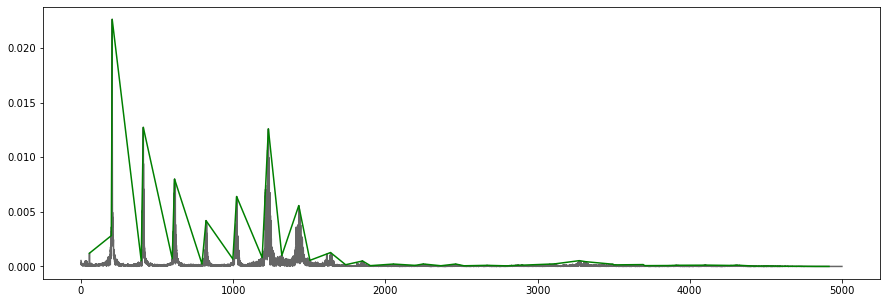

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(signal_x, get_fft(singal_r), alpha=0.6, color='black')
ax.plot(signal_x[ind_max], sig_max, color='green')
plt.show()